In [3]:
import os
import cv2
import numpy as np
import random

def get_png_filename_list(directory):
    return sorted([f for f in os.listdir(directory) if f.endswith('.png')])

class DataGen:
    def __init__(self, path, split_ratio, x, y, color_space='rgb'):
        self.x = x
        self.y = y
        self.path = path
        self.color_space = color_space
        self.path_train_images = os.path.join(path, "train/images/")
        self.path_train_labels = os.path.join(path, "train/labels/")

        # Obtén las listas de archivos
        self.image_file_list = get_png_filename_list(self.path_train_images)
        self.label_file_list = get_png_filename_list(self.path_train_labels)

        # Baraja ambas listas de forma sincronizada
        self.image_file_list, self.label_file_list = self.shuffle_image_label_lists_together()

        self.split_index = int(split_ratio * len(self.image_file_list))
        self.x_train_file_list = self.image_file_list[self.split_index:]
        self.y_train_file_list = self.label_file_list[self.split_index:]
        self.x_val_file_list = self.image_file_list[:self.split_index]
        self.y_val_file_list = self.label_file_list[:self.split_index]

    def shuffle_image_label_lists_together(self):
        combined = list(zip(self.image_file_list, self.label_file_list))
        random.shuffle(combined)
        image_file_list, label_file_list = zip(*combined)
        return list(image_file_list), list(label_file_list)

    def load_image(self, image_path):
        # Lee la imagen en el espacio de color especificado
        img = cv2.imread(image_path)
        img = cv2.resize(img, (self.x, self.y))
        return img / 255.0  # Normaliza la imagen entre 0 y 1

    def load_label(self, label_path):
        # Lee la etiqueta (máscara)
        label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
        label = cv2.resize(label, (self.x, self.y))
        return label / 255.0  # Normaliza la etiqueta entre 0 y 1

    def generate_data(self, batch_size, train=False, val=False):
        while True:
            if train:
                x_file_list = self.x_train_file_list
                y_file_list = self.y_train_file_list
            elif val:
                x_file_list = self.x_val_file_list
                y_file_list = self.y_val_file_list

            for i in range(0, len(x_file_list), batch_size):
                x_batch = np.zeros((batch_size, self.x, self.y, 3))
                y_batch = np.zeros((batch_size, self.x, self.y, 1))

                for j in range(batch_size):
                    if (i + j) >= len(x_file_list):
                        break
                    x_batch[j] = self.load_image(os.path.join(self.path_train_images, x_file_list[i + j]))
                    y_batch[j] = np.expand_dims(self.load_label(os.path.join(self.path_train_labels, y_file_list[i + j])), axis=-1)

                yield x_batch, y_batch


In [10]:
# Varibales and data generator
input_dim_x=224
input_dim_y=224
n_filters = 32
image_dir = 'Downloads/Ciclo 2024-2/Aplicaciones clinicas de imagenes/azh_wound'
data_gen = DataGen( image_dir + '/', split_ratio=0.2, x=input_dim_x, y=input_dim_y)

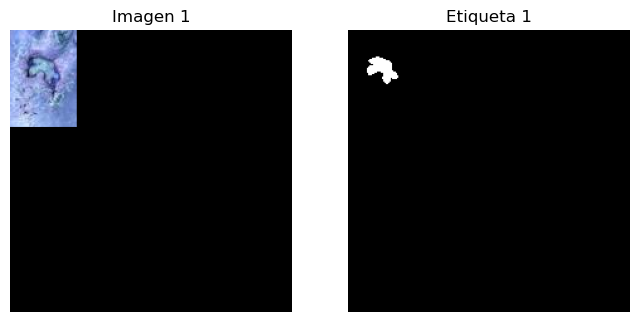

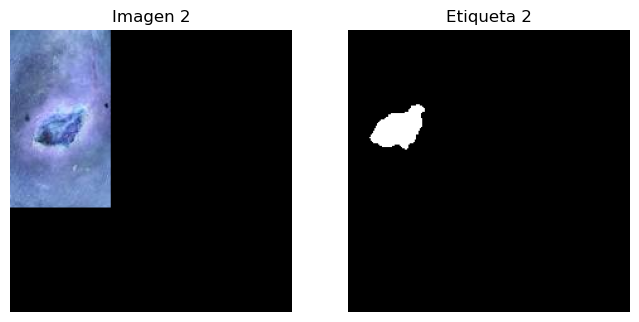

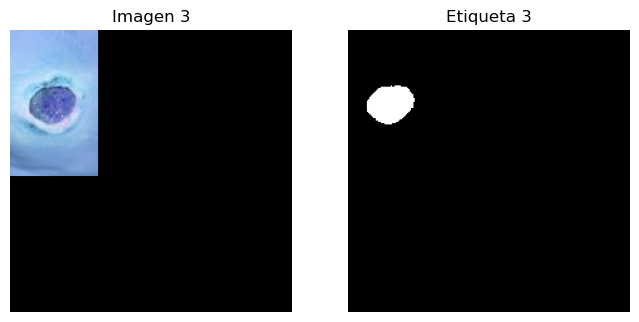

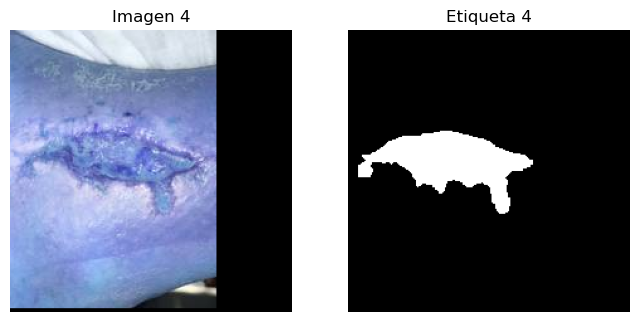

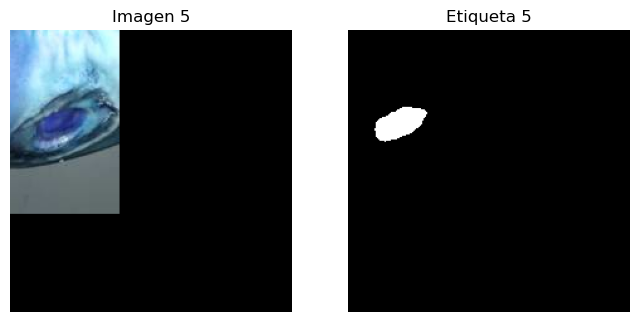

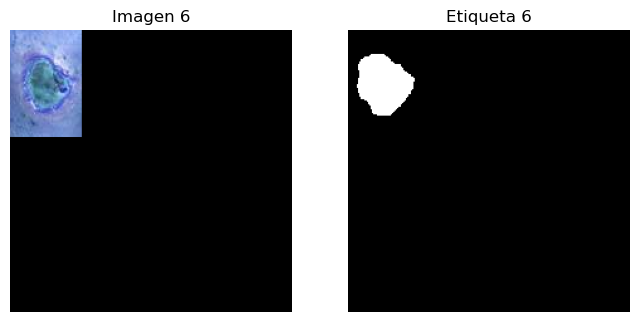

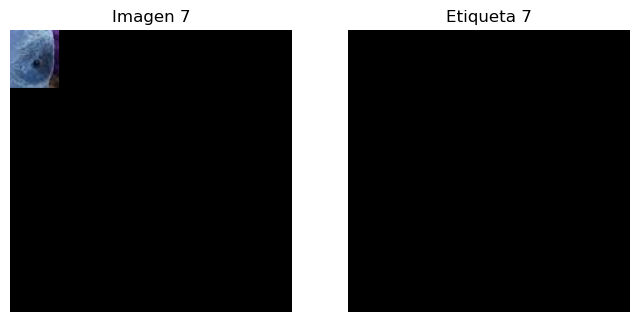

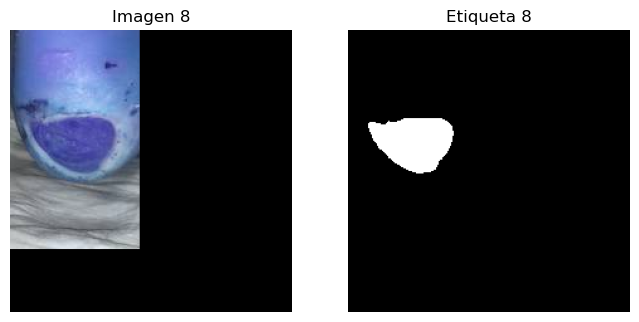

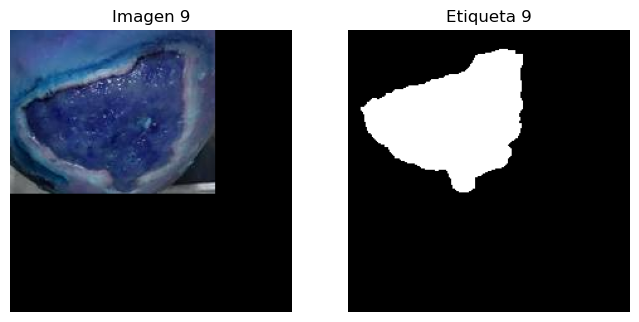

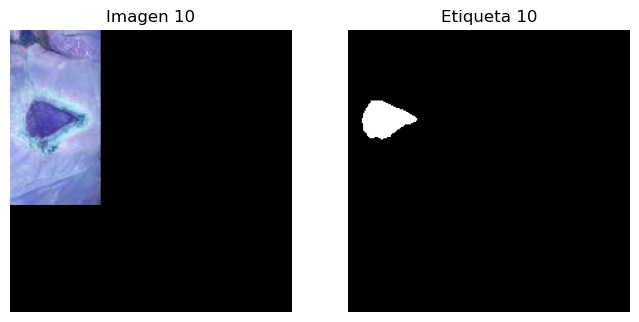

In [12]:
import matplotlib.pyplot as plt

# Generar un lote de datos de entrenamiento usando data_gen
image_batch, label_batch = next(data_gen.generate_data(batch_size=10, train=True))

# Mostrar las primeras 10 imágenes y etiquetas correspondientes
for i in range(10):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Desnormalizar la imagen (asumiendo que los valores estaban entre 0 y 1)
    image = image_batch[i] * 255  # Multiplicamos por 255 para revertir la normalización si es necesario
    image = image.astype('uint8')  # Convertir a uint8 para mostrar la imagen correctamente

    # Mostrar la imagen
    axes[0].imshow(image)
    axes[0].set_title(f"Imagen {i+1}")
    axes[0].axis('off')

    # Mostrar la etiqueta (máscara)
    axes[1].imshow(label_batch[i].squeeze(), cmap='gray')
    axes[1].set_title(f"Etiqueta {i+1}")
    axes[1].axis('off')

    plt.show()

In [16]:
!pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 645.5 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 2.8 MB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.9 MB/s eta 0:00:00
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 8.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 13.1 MB/s eta 0:00:00
Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
   ━━━━━━━━━━━━━━

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Concatenate, UpSampling2D, Input

class SegNet:
    def __init__(self, n_filters, input_dim_x, input_dim_y, num_channels):
        self.input_dim_x = input_dim_x
        self.input_dim_y = input_dim_y
        self.n_filters = n_filters
        self.num_channels = num_channels

    def get_SegNet(self):
        # Input layer
        convnet_input = Input(shape=(self.input_dim_x, self.input_dim_y, self.num_channels))

        # Encoder path
        encoder_conv1 = Conv2D(self.n_filters, kernel_size=9, activation='relu', padding='same')(convnet_input)
        pool1 = MaxPooling2D(pool_size=(2, 2))(encoder_conv1)

        encoder_conv2 = Conv2D(self.n_filters, kernel_size=5, activation='relu', padding='same')(pool1)
        pool2 = MaxPooling2D(pool_size=(2, 2))(encoder_conv2)

        encoder_conv3 = Conv2D(self.n_filters * 2, kernel_size=5, activation='relu', padding='same')(pool2)
        pool3 = MaxPooling2D(pool_size=(2, 2))(encoder_conv3)

        encoder_conv4 = Conv2D(self.n_filters * 2, kernel_size=5, activation='relu', padding='same')(pool3)
        pool4 = MaxPooling2D(pool_size=(2, 2))(encoder_conv4)

        # Bottleneck layer
        conv5 = Conv2D(self.n_filters, kernel_size=5, activation='relu', padding='same')(pool4)

        # Decoder path
        decoder_conv6 = Conv2D(self.n_filters, kernel_size=7, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv5))
        decoder_conv7 = Conv2D(self.n_filters, kernel_size=5, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(decoder_conv6))
        decoder_conv8 = Conv2D(self.n_filters, kernel_size=5, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(decoder_conv7))

        # Output layer with sigmoid activation for binary segmentation
        decoder_conv9 = Conv2D(1, kernel_size=1, activation='sigmoid', padding='same')(UpSampling2D(size=(2, 2))(decoder_conv8))

        # Create the model
        model = Model(inputs=convnet_input, outputs=decoder_conv9)

        return model, 'SegNet'


In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import MeanIoU

# Definir las dimensiones de entrada
input_dim_x = 224
input_dim_y = 224
n_filters = 32
num_channels = 3  # RGB images


# Crear el modelo SegNet
segnet = SegNet(n_filters, input_dim_x, input_dim_y, num_channels)
model, model_name = segnet.get_SegNet()

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=[MeanIoU(num_classes=2)])  # MeanIoU para evaluar segmentación binaria

# Resumen del modelo
model.summary()

# Generar datos para entrenamiento y validación
batch_size = 16  # Definir el tamaño del lote
train_gen = data_gen.generate_data(batch_size=batch_size, train=True)
val_gen = data_gen.generate_data(batch_size=batch_size, val=True)

# Definir el número de pasos por época y el número de épocas
steps_per_epoch = len(data_gen.x_train_file_list) // batch_size
validation_steps = len(data_gen.x_val_file_list) // batch_size
epochs = 50  # Número de épocas



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,905 (1.30 MB)

 Trainable params: 339,905 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Entrenar el modelo
history = model.fit(train_gen,
                    validation_data=val_gen,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=epochs)

# Guardar el modelo entrenado
model.save(f'{model_name}_trained.h5')

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 0.3263 - mean_io_u: 0.4865 - val_loss: 0.0661 - val_mean_io_u: 0.4859
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 0.0624 - mean_io_u: 0.4869 - val_loss: 0.0550 - val_mean_io_u: 0.4867
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 0.0576 - mean_io_u: 0.4867 - val_loss: 0.0524 - val_mean_io_u: 0.4868
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 0.0527 - mean_io_u: 0.4869 - val_loss: 0.0524 - val_mean_io_u: 0.4864
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 0.0488 - mean_io_u: 0.4871 - val_loss: 0.0494 - val_mean_io_u: 0.4867
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 0.0455 - mean_io_u: 0.4870 - val_loss: 0.0468 - val_mean_io_u: 0.4860
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 0.0422 - mean_io_u: 0.4871 - val_loss: 0.0453 - val_mean_io_u: 0.4860
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 0.0414 - mean_io_u: 0.4868 - val_loss: 0.0439 